In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn.preprocessing as prepro
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor)
from sklearn.model_selection import learning_curve


data_test = pd.read_csv("F:/python/kaggle/Tatanic/dataset/test.csv")
data_train = pd.read_csv("F:/python/kaggle/Tatanic/dataset/train.csv")



data_train.loc[data_train.Cabin.notnull(), 'Cabin'] = 1
data_train.loc[data_train.Cabin.isnull(), 'Cabin'] = 0
data_test.loc[data_test.Cabin.notnull(), 'Cabin'] = 1
data_test.loc[data_test.Cabin.isnull(), 'Cabin'] = 0

data_train.loc[data_train.Age.isnull(), 'Age'] = data_train['Age'].mean()
data_test.loc[data_test.Age.isnull(), 'Age'] = data_test['Age'].mean()


data_test.loc[data_test.Fare.isnull(), 'Fare'] = data_test['Fare'].mean()

scaler = prepro.StandardScaler().fit(data_train['Age'].reshape(-1, 1))
data_train['Age'] = scaler.transform(data_train['Age'].reshape(-1, 1))
scaler = prepro.StandardScaler().fit(data_train['Fare'].reshape(-1,1))
data_train['Fare'] = scaler.transform(data_train['Fare'].reshape(-1, 1))

scaler = prepro.StandardScaler().fit(data_test['Age'].reshape(-1, 1))
data_test['Age'] = scaler.transform(data_test['Age'].reshape(-1, 1))
scaler = prepro.StandardScaler().fit(data_test['Fare'].reshape(-1,1))
data_test['Fare'] = scaler.transform(data_test['Fare'].reshape(-1, 1))


dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix = 'Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')


dummies_Sex = pd.get_dummies(data_train['Sex'], prefix = 'Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix = 'Pclass')



data_train = data_train.drop(['Name', 'Ticket','Pclass', 'Embarked', 'Sex', 'Cabin'], axis = 1)

data_train = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis =1)


dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix = 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_test['Sex'], prefix = 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix = 'Pclass')


data_test = data_test.drop(['Name', 'Ticket','Pclass', 'Embarked', 'Sex', 'Cabin'], axis = 1)

data_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis =1)



# 用正则取出我们要的属性值
train_df = data_train.filter(regex='Survived|Age|SibSp|Parch|Fare|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

test_df = data_test.filter(regex='Survived|Age|SibSp|Parch|Fare|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
test_np = test_df.as_matrix()

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf_l = linear_model.LogisticRegression(C = 0.3, penalty = 'l1', tol = 1e-6)

#bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
#bagging_clf.fit(X, y)
clf_l.fit(X,y)



#y_test = bagging_clf.predict(test_np)

y_test = clf_l.predict(test_np)








result = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': y_test.astype(np.int32)})


result.to_csv("F:\python\kaggle\Tatanic/dataset\\result1.csv", index = False)



AttributeError: 'DataFrame' object has no attribute 'Cabin'

In [2]:
type(y_test)

NameError: name 'y_test' is not defined

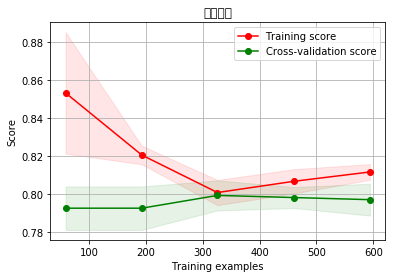

In [79]:
from sklearn.model_selection import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
   
    return plt


plot_learning_curve(clf_l, u"学习曲线", X, y).show()


In [11]:
compare = pd.read_csv("F:\python/kaggle/Tatanic/dataset/submit.csv")
count = 0
for i in range(np.size(compare['Survived'])):
    if compare['Survived'][i] != result['Survived'][i]:
        count = count + 1
count


23

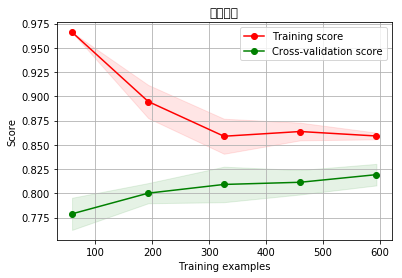

26

In [102]:
clf_c = RandomForestClassifier(max_depth = 5, n_estimators = 46)
clf_c.fit(X,y)
y_test_c = clf_c.predict(test_np)


result = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': y_test_c.astype(np.int32)})


result.to_csv("F:\python\kaggle\Tatanic/dataset\\resultc.csv", index = False)



In [83]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('select', SelectKBest(k = 'all')), ('RFC', RandomForestClassifier() )])

para_list = {'RFC__n_estimators': list(range(20,50,2)),
                'RFC__max_depth': list(range(3,60,3))}

gsearch = GridSearchCV(estimator = pipe, param_grid = para_list, scoring = 'roc_auc', cv = 10)

gsearch.fit(X,y)

print(gsearch.best_params_,gsearch.best_score_)

{'RFC__max_depth': 9, 'RFC__n_estimators': 46} 0.8740257453864108


In [6]:

data_train


,0,3,22,1,0.1,7.25
0,1,1,38.0,1,0,71.2833
1,1,3,26.0,0,0,7.9250
2,1,1,35.0,1,0,53.1000
3,0,3,35.0,0,0,8.0500
4,0,3,NaN,0,0,8.4583
5,0,1,54.0,0,0,51.8625
6,0,3,2.0,3,1,21.0750
7,1,3,27.0,0,2,11.1333
8,1,2,14.0,1,0,30.0708
9,1,3,4.0,1,1,16.7000


In [8]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn.preprocessing as prepro
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor)
from sklearn.model_selection import learning_curve


data_test = pd.read_csv("F:/python/kaggle/Tatanic/dataset/test.csv")
data_train = pd.read_csv("F:/python/kaggle/Tatanic/dataset/train.csv")
data_train.set_index(['3']).index


Int64Index([1, 3, 1, 3, 3, 1, 3, 3, 2, 3,
            ...
            3, 3, 2, 3, 3, 2, 1, 3, 1, 3],
           dtype='int64', name='3', length=890)